# Basic Stock Price Analysis with Python
In this notebook I will try to make a stock analysis of two major aviation companies of Turkey, namely THY and PEGASUS.

In [1]:
## If yfinance is not already installed in your computer, run "pip install yfinance" in your Jupyter notebook
## pip install yfinance

In [2]:
## Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print("-"*25)
print ("Initiation is DONE !!")
print("-"*25)

-------------------------
Initiation is DONE !!
-------------------------


## 1. LOADING HISTORICAL PRICE DATA OF THE STOCKS

In [3]:
thy = yf.Ticker('THYAO.IS')

df_thy = thy.history(period='max', prepost=True)
df_thy.columns = [ 'THY_' + col for col in df_thy.columns]

print(df_thy.shape)
print("-"*25)
df_thy.tail()

(5210, 7)
-------------------------


,THY_Open,THY_High,THY_Low,THY_Close,THY_Volume,THY_Dividends,THY_Stock Splits
Date,,,,,,,
2020-06-22,12.60,12.82,12.56,12.62,103366791,0.0,0.0
2020-06-23,12.68,12.74,12.48,12.55,59629576,0.0,0.0
2020-06-24,12.56,12.64,12.37,12.39,52187522,0.0,0.0
2020-06-25,12.39,12.51,12.26,12.39,44406156,0.0,0.0
2020-06-26,12.57,12.63,12.42,12.47,36069729,0.0,0.0


In [4]:
pgs = yf.Ticker('PGSUS.IS')

df_pgs = pgs.history(period='max', prepost=True)
df_pgs.columns = [ 'PGS_' + col for col in df_pgs.columns]

print(df_pgs.shape)
print("-"*25)
df_pgs.tail()

(1864, 7)
-------------------------


,PGS_Open,PGS_High,PGS_Low,PGS_Close,PGS_Volume,PGS_Dividends,PGS_Stock Splits
Date,,,,,,,
2020-06-22,56.10,56.75,55.95,56.15,2795682,0,0
2020-06-23,56.45,56.70,55.75,55.90,2082708,0,0
2020-06-24,55.85,56.25,54.95,55.05,2505319,0,0
2020-06-25,54.95,55.20,53.05,53.90,2737604,0,0
2020-06-26,55.00,55.50,53.90,54.05,2106426,0,0


In [5]:
df = df_thy.merge(df_pgs, how='left', left_index=True, right_index=True)

print(df.shape)
print("-"*25)
df.tail()

(5210, 14)
-------------------------


,THY_Open,THY_High,THY_Low,THY_Close,THY_Volume,THY_Dividends,THY_Stock Splits,PGS_Open,PGS_High,PGS_Low,PGS_Close,PGS_Volume,PGS_Dividends,PGS_Stock Splits
Date,,,,,,,,,,,,,,
2020-06-22,12.60,12.82,12.56,12.62,103366791,0.0,0.0,56.10,56.75,55.95,56.15,2795682.0,0.0,0.0
2020-06-23,12.68,12.74,12.48,12.55,59629576,0.0,0.0,56.45,56.70,55.75,55.90,2082708.0,0.0,0.0
2020-06-24,12.56,12.64,12.37,12.39,52187522,0.0,0.0,55.85,56.25,54.95,55.05,2505319.0,0.0,0.0
2020-06-25,12.39,12.51,12.26,12.39,44406156,0.0,0.0,54.95,55.20,53.05,53.90,2737604.0,0.0,0.0
2020-06-26,12.57,12.63,12.42,12.47,36069729,0.0,0.0,55.00,55.50,53.90,54.05,2106426.0,0.0,0.0


## 2. VISUALISATION OF THE STOCK PRICES

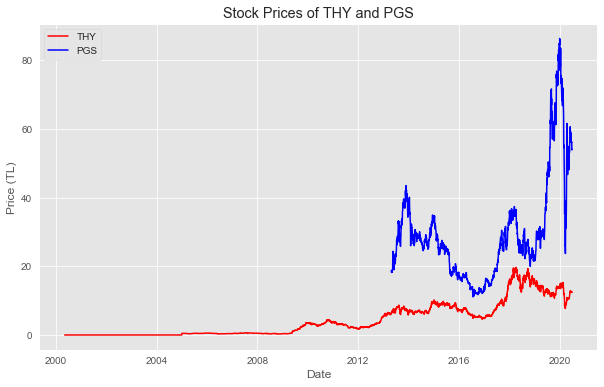

In [6]:
fig, ax = plt.subplots( figsize=(10,6) )

sns.lineplot( data=df,  x=df.index,  y='THY_Close', color='r'  )
sns.lineplot( data=df,  x=df.index,  y='PGS_Close', color='b'  )

plt.title('Stock Prices of THY and PGS')
plt.ylabel('Price (TL)')
plt.legend(['THY','PGS'])

plt.show()

There seems to be 3 problems in the graph of the closing prices:
 - There is no price data before 2013 for PGS
 - The price values of the stocks are far apart from each other
 - The correlation in the high variation is not easily detectable

To get rid of these problems there are 2 main solutions, we can adjust the size of the data and create subplots.

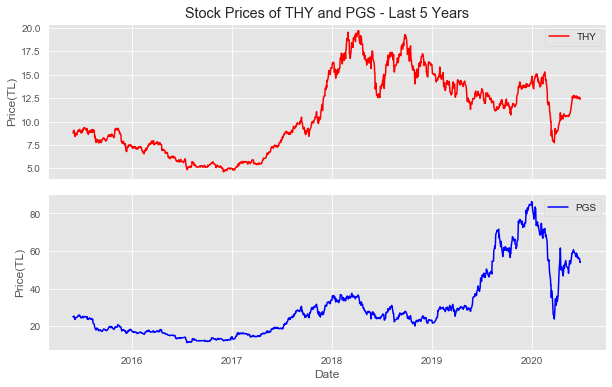

In [7]:
p5 = df.loc['2015-06-01':][['THY_Close', 'PGS_Close']]

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,6) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p5,  x=p5.index,  y='THY_Close', color='r', label='THY', ax=ax0 )
ax0.set(title='Stock Prices of THY and PGS - Last 5 Years', ylabel='Price(TL)')

sns.lineplot( data=p5,  x=p5.index,  y='PGS_Close', color='b', label='PGS', ax=ax1 )
ax1.set( ylabel='Price(TL)' )

plt.show()

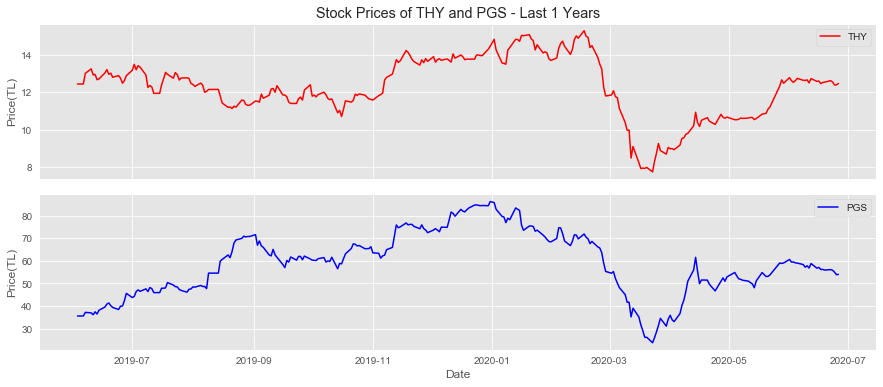

In [8]:
p1 = df.loc['2019-06-01':][['THY_Close', 'PGS_Close']]

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,6) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='THY_Close', color='r', label='THY', ax=ax0 )
ax0.set(title='Stock Prices of THY and PGS - Last 1 Year', ylabel='Price(TL)')

sns.lineplot( data=p1,  x=p1.index,  y='PGS_Close', color='b', label='PGS', ax=ax1 )
ax1.set( ylabel='Price(TL)' )

plt.show()

The sharp decrease of the prices in March 2020 is clearly the impact of coronavirus. The impact seems severe because the aviation sector took one of the strongest hits in this process. After the first hit, there seems to be an amelioration in the shape of __"V"__, but there are experts who are forecasting the shape of the prices will be similar to __"W"__. Let's dig in further:

## 3. RETURN CALCULATION

### 3.1. PERCENTAGE CHANGE IN PRICES

In [9]:
p5['THY_Retun_Pct'] = p5['THY_Close'].pct_change()
p5['PGS_Retun_Pct'] = p5['PGS_Close'].pct_change()

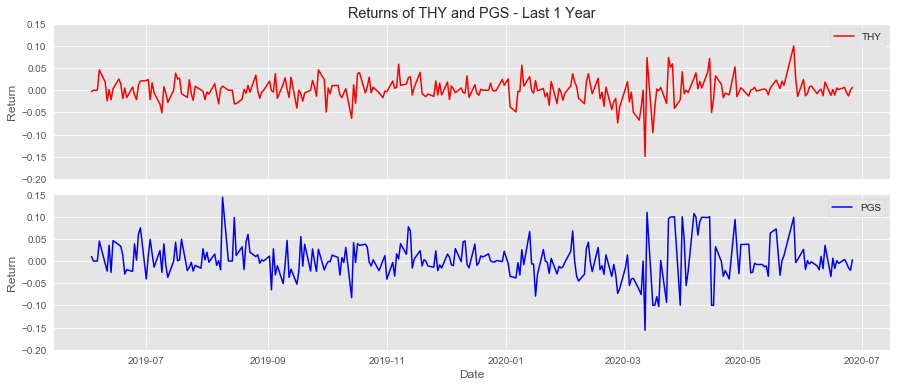

In [21]:
p1 = p5.loc['2019-06-01': ]

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,6) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='THY_Retun_Pct', color='r', label='THY', ax=ax0 )
ax0.set(title='Returns of THY and PGS - Last 1 Year', ylabel='Return', ylim=(-0.20,0.15) )

sns.lineplot( data=p1,  x=p1.index,  y='PGS_Retun_Pct', color='b', label='PGS', ax=ax1 )
ax1.set( ylabel='Return' , ylim=(-0.20,0.15)  )

plt.show()

### 3.2. LOGARITHM OF RATIO OF PRICES

In [11]:
p5['THY_Retun_ln'] = np.log( p5['THY_Close'] / p5['THY_Close'].shift(1) )       
p5['PGS_Retun_ln'] = np.log( p5['PGS_Close'] / p5['PGS_Close'].shift(1) )

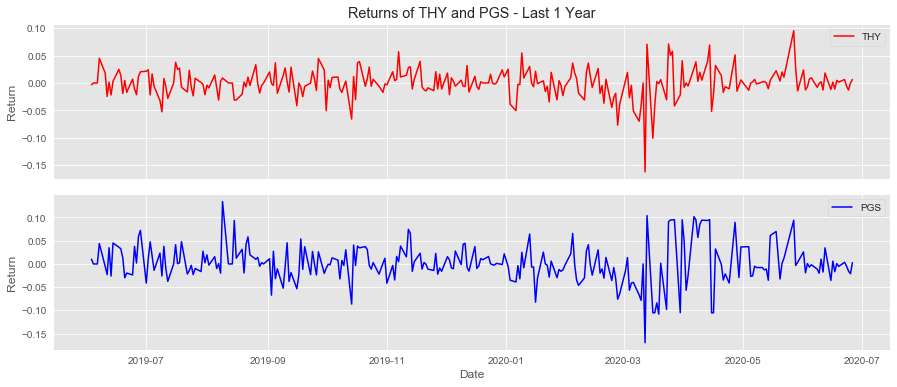

In [20]:
p1 = p5.loc['2019-06-01': ]

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,6) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='THY_Retun_ln', color='r', label='THY', ax=ax0 )
ax0.set(title='Returns of THY and PGS - Last 1 Year', ylabel='Return', ylim=(-0.20,0.15))

sns.lineplot( data=p1,  x=p1.index,  y='PGS_Retun_ln', color='b', label='PGS', ax=ax1 )
ax1.set( ylabel='Return', ylim=(-0.20,0.15) )

plt.show()

## 4. ROLLING MEAN (MOVING AVERAGE)

In [14]:
p5['THY_Retun_rol_20'] = p5['THY_Close'].rolling(20).mean()
p5['PGS_Retun_rol_20'] = p5['PGS_Close'].rolling(20).mean()
p5['THY_Retun_rol_50'] = p5['THY_Close'].rolling(50).mean()
p5['PGS_Retun_rol_50'] = p5['PGS_Close'].rolling(50).mean()

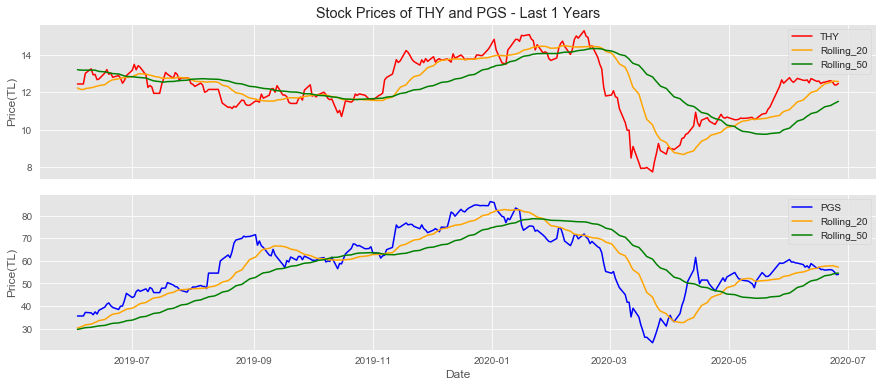

In [15]:
p1 = p5.loc['2019-06-01': ]

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,6) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='THY_Close',        color='r', label='THY', ax=ax0 )
sns.lineplot( data=p1,  x=p1.index,  y='THY_Retun_rol_20', color='orange', label='Rolling_20', ax=ax0 )
sns.lineplot( data=p1,  x=p1.index,  y='THY_Retun_rol_50', color='green', label='Rolling_50', ax=ax0 )
ax0.set(title='Stock Prices of THY and PGS - Last 1 Year', ylabel='Price(TL)')

sns.lineplot( data=p1,  x=p1.index,  y='PGS_Close', color='b', label='PGS', ax=ax1 )
sns.lineplot( data=p1,  x=p1.index,  y='PGS_Retun_rol_20', color='orange', label='Rolling_20', ax=ax1 )
sns.lineplot( data=p1,  x=p1.index,  y='PGS_Retun_rol_50', color='green', label='Rolling_50', ax=ax1 )
ax1.set( ylabel='Price(TL)' )

plt.show()

In [13]:
p5.describe()

,THY_Close,PGS_Close,THY_Retun_Pct,PGS_Retun_Pct,THY_Retun_ln,PGS_Retun_ln
count,1318.000000,1318.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,10.771093,29.604127,0.000556,0.001000,0.000267,0.000587
std,4.103712,17.380125,0.023972,0.028766,0.024089,0.028721
min,4.630000,11.100000,-0.149448,-0.155950,-0.161870,-0.169544
25%,7.280000,16.942500,-0.011997,-0.013450,-0.012070,-0.013541
50%,10.220000,24.800000,0.000000,0.000000,0.000000,0.000000
75%,14.170000,33.785000,0.013814,0.015124,0.013720,0.015011
max,19.690000,86.350000,0.099911,0.143695,0.095229,0.134264
